In [ ]:
#|default_exp vis.core

# Visualization

> Maplotlib charts

In [ ]:
#hide
from nbdev.showdoc import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#|export
#nbdev_comment from __future__ import annotations
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
from matplotlib import ticker
from fastcore.test import *

from mirzoo.data.loading import get_spectra

## CONFIGS

In [ ]:
#|export
PRIMARY_COLOR = '#333'
ACCENT_COLOR = 'firebrick'
DEFAULT_STYLE = {
    'axes.linewidth': 0.5,
    'axes.facecolor': 'white',
    'axes.ymargin': 0.11,
    'font.size': 8,
    
    'axes.spines.bottom': True,
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.grid': True,
    
    'grid.color': 'black',
    'grid.linewidth': 0.2,
    'grid.linestyle': '-',

    'xtick.bottom': True,
    'xtick.top': False,
    'xtick.direction': 'out',
    'xtick.major.size': 5,
    'xtick.major.width': 1,
    'xtick.minor.size': 3,
    'xtick.minor.width': 0.5,
    'xtick.minor.visible': True,
        
    'ytick.left': True,
    'ytick.right': False, 
    'ytick.direction': 'in',
    'ytick.major.size': 5,
    'ytick.major.width': 1,
    'ytick.minor.size': 3,
    'ytick.minor.width': 0.5,
    'ytick.minor.visible': True
}

centimeter = 1/2.54  # centimeters in inches

In [ ]:
#|export
def set_style(style:dict # Dictionary of plt.rcParams
             ):
    for k, v in style.items():
        plt.rcParams[k] = v 

## EDA

In [ ]:
#|export
def plot_spectra(X:np.ndarray, # Spectra (n_samples, n_wavenumbers)
                 X_names:np.ndarray, # Wavenumbers (n_wavenumbers)
                 ylabel:str='Absorbance', # y axis label
                 figsize=(18, 5), # Wavenumbers
                 sample=20): # Size of random subset
    """Plot Mid-infrared spectra"""
    fig, ax = plt.subplots(figsize=figsize)
    idx = np.random.randint(X.shape[0], size=sample)
    ax.set_xlim(np.max(X_names), np.min(X_names))
    ax.set(xlabel='Wavenumber', ylabel=ylabel)
    ax.set_axisbelow(True)
    ax.grid(True, which='both')
    _ = ax.plot(X_names, X[idx, :].T)

In [ ]:
fname = './files/RT_STD_allMIRspectra_raw.csv'
orgs, smp_ids, X_names, X, _ = get_spectra(fname)

In [ ]:
X.shape

(1118, 1701)

In [ ]:
X_names

array([ 600,  602,  604, ..., 3996, 3998, 4000])

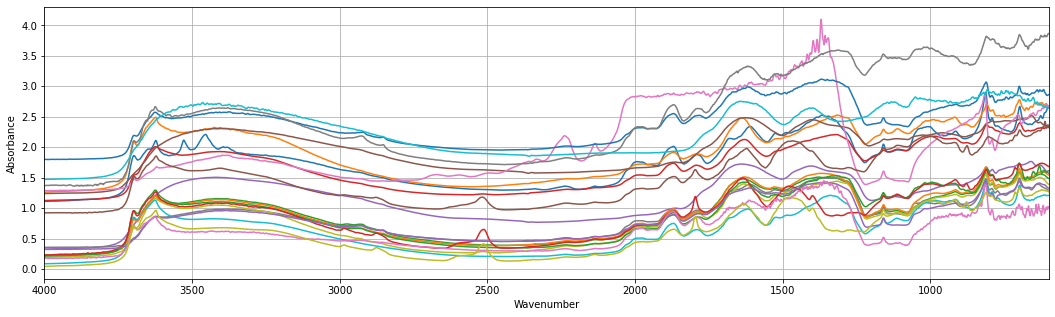

In [ ]:
plot_spectra(X, X_names)

## Validation curves

In [ ]:
#|export
def plot_validation_curve(x, losses, ax=None, plot_kwargs={}, fill_between_kwargs={}):
    Y = np.mean(np.array(losses), axis=0)
    SD = np.std(np.array(losses), axis=0) 
    ax.fill_between(x, Y + SD, Y - SD, **fill_between_kwargs)
    ax.plot(x, Y, **plot_kwargs) 
    return(ax)

## Learning curves

In [ ]:
#|export
def plot_learning_curve(x, losses_train, losses_valid, ax=None,  train_kwargs={}, valid_kwargs={}):
    if ax is None:
        ax = plt.gca()
    ax.plot(x, losses_train, label='Training', **train_kwargs) 
    ax.plot(x, losses_valid, label='Validation', **valid_kwargs) 
    ax.set_yscale('log')
    ax.set_xscale('log')
    return(ax)

In [ ]:
#|export
def plot_capacity(x, capacity, ax=None, **kwargs):
    if ax is None:
            ax = plt.gca()
    ax.bar(x, capacity, width=0.15*np.array(x), color=PRIMARY_COLOR, zorder=99, **kwargs)
    ax.set_yscale('log')
    ax.set_xscale('log')
    # ax.spines.bottom.set_visible(True) 
    return(ax)